In [109]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import scipy.stats as stats
from sklearn import preprocessing
from matplotlib import cm

# Climate Data

In [127]:
climate = pd.read_csv("Data/2023_scm_climate.csv")
climate = clean_columns(climate)
climate["date"] = pd.to_datetime(climate["date"], format="%m/%d/%y")
climate["week"] = climate["date"].dt.strftime("%U").astype(int)
# climate


# Weekly Climate Data

In [128]:
one_week_climate = pd.read_csv("Data/2023_adults_one_week_climate.csv")
one_week_climate["collection_date"] = pd.to_datetime(one_week_climate["collection_date"])

two_week_climate = pd.read_csv("Data/2023_adults_two_week_climate.csv")
two_week_climate["collection_date"] = pd.to_datetime(two_week_climate["collection_date"])


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_72394/197453588.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  one_week_climate["collection_date"] = pd.to_datetime(one_week_climate["collection_date"])
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_72394/197453588.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  two_week_climate["collection_date"] = pd.to_datetime(two_week_climate["collection_date"])


# GDD Data

In [129]:
gdd = pd.read_csv("Data/2023_scm_gdd.csv")
gdd = clean_columns(gdd)
gdd["date"] = pd.to_datetime(gdd["date"], format="%m/%d/%y")

# Management Data

In [130]:
management = pd.read_csv("Data/2023_management.csv")
management = clean_columns(management)
#management


In [123]:
planting_date = pd.read_csv('Data/2023_scm_planting_dates.csv')
planting_date.head()

Record ID Planting date
0        LET_TAB        5/7/23
1        GAB_ALL        5/9/23
2        SMI_CRO        5/9/23
3        SMI_DOU       5/10/23
4  DEG_PER_STRIP       5/10/23

# Soil Data

In [131]:
soil = pd.read_csv("Data/2023_scm_soil.csv")
soil = clean_columns(soil)
#soil

In [132]:
dairy_one = pd.read_csv('Data/2023_dairy_one.csv')
dairy_one = clean_columns(dairy_one)
#dairy_one

# Landscape Data

## 500m Radius

In [133]:
cdl_500 = pd.read_csv("Data/Landscape/cdl_500_history.csv")
cdl_500 = cdl_500.drop("Unnamed: 0", axis=1)


## 1000m Radius

In [134]:
cdl_1000 = pd.read_csv("Data/Landscape/cdl_1000_history.csv")
cdl_1000 = cdl_1000.drop("Unnamed: 0", axis=1)


## 2000m Radius

In [135]:
cdl_2000 = pd.read_csv("Data/Landscape/cdl_2000_history.csv")
cdl_2000 = cdl_2000.drop("Unnamed: 0", axis=1)


## 3000m Radius

In [136]:
cdl_3000 = pd.read_csv("Data/Landscape/cdl_3000_history.csv")
cdl_3000 = cdl_3000.drop("Unnamed: 0", axis=1)


# Sticky Card Data

In [137]:
adults = pd.read_csv("Data/2023_scm_counts.csv")
adults = clean_columns(adults)
adults["collection_date"] = pd.to_datetime(adults["collection_date"], format="%m/%d/%y")
adults["week"] = adults["collection_date"].dt.strftime("%U")
adults = adults.drop(["initials"], axis=1)
adults = adults.dropna()
adults = adults.rename({"site": "record_id"}, axis=1)
adults["total_f_scm"] = adults["n_scm_i_f"] + adults["n_scm_o_f"]
adults["total_m_scm"] = adults["n_scm_i_m"] + adults["n_scm_o_m"]
adults["total_scm"] = adults["total_m_scm"] + adults["total_f_scm"]
adults


card_id data_collector     record_id collection_date  n_scm_i_m  \
20       2246   Janice Degni  DEG_DIE_HILL      2023-04-21       16.0   
22       2266   Janice Degni  DEG_DIE_HILL      2023-04-27       43.0   
24       2374   Janice Degni  DEG_DIE_HILL      2023-05-04       40.0   
26       2560   Janice Degni  DEG_DIE_HILL      2023-05-11       80.0   
28       2558   Janice Degni  DEG_DIE_HILL      2023-05-18       21.0   
...       ...            ...           ...             ...        ...   
2237     2270  Marion Zuefle       ZUE_REE      2023-04-19        1.0   
2239     2272  Marion Zuefle       ZUE_REE      2023-04-26       44.0   
2241     2384  Marion Zuefle       ZUE_REE      2023-05-02       45.0   
2245     2552  Marion Zuefle       ZUE_REE      2023-05-17       38.0   
2246     2636  Marion Zuefle       ZUE_REE      2023-05-23       86.0   

      n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o week  \
20         10.0        7.0        5.0              0.0              0.0   16   
22          9.0       51.0       12.0              0.0              0.0   17   
24         20.0      136.0      128.0              9.0             44.0   18   
26         18.0       36.0       15.0              3.0              0.0   19   
28          0.0        4.0        3.0              0.0              0.0   20   
...         ...        ...        ...              ...              ...  ...   
2237        2.0        4.0        1.0              0.0              0.0   16   
2239       34.0       21.0       34.0              0.0              0.0   17   
2241       47.0       27.0       46.0              3.0              4.0   18   
2245       21.0        5.0        3.0              4.0              2.0   20   
2246       68.0       16.0       10.0              0.0              0.0   21   

      total_f_scm  total_m_scm  total_scm  
20           15.0         23.0       38.0  
22           21.0         94.0      115.0  
24          148.0        176.0      324.0  
26           33.0        116.0      149.0  
28            3.0         25.0       28.0  
...           ...          ...        ...  
2237          3.0          5.0        8.0  
2239         68.0         65.0      133.0  
2241         93.0         72.0      165.0  
2245         24.0         43.0       67.0  
2246         78.0        102.0      180.0  

[605 rows x 14 columns]

# Visualize All Sticky Card Data 

In [34]:
site_dict = {
    "Janice Degni": [
        "DEG_DIE_HILL",
        "DEG_DIE_SWC",
        "DEG_FOU_WOOD",
        "DEG_PER_STRIP",
        "DEG_VIL",
        "DEG_YOU_BOCES",
        "DEG_YOU_JONES",
        "DEG_YOU_OSHEA",
    ],
    "Poveda Lab": ["DIP_CUR", "DIP_FLE", "DIP_PAT", "POV_DUN"],
    "Aaron Gabriel": ["GAB_ALL", "GAB_STE"],
    "Katelyn Miller": [
        "KAT_BAR",
        "KAT_HAB",
        "KAT_HAB_2",
        "KAT_JEF",
        "KAT_JEF_2",
        "KAT_SAU",
        "KAT_SAU_2",
        "KAT_TEE",
        "KAT_TEE_2",
    ],
    "Jodi Letham": ["LET_NOB", "LET_TAB"],
    "Jeff Miller": ["MIL_CHA", "MIL_MCC", "MIL_YOD"],
    "Abby Seaman": ["SEA_HOO"],
    "Erik Smith": [
        "SMI_CAN",
        "SMI_COB",
        "SMI_CRO",
        "SMI_DOU",
        "SMI_DUR",
        "SMI_HOF",
        "SMI_HOL",
        "SMI_JOH",
        "SMI_JOH_2",
        "SMI_KEL",
        "SMI_LAT",
        "SMI_MCC",
    ],
    "Mike Stanyard": ["STA_COL", "STA_HEM", "STA_HEM_2", "STA_SWE", "STA_WIL"],
    "Ken Wise": ["WIS_COO", "WIS_COO_2", "WIS_HIG", "WIS_KEN", "WIS_MEG"],
    "Marion Zuefle": ["ZUE_REE"],
}


In [35]:
collectors = site_dict.keys()
collectors

dict_keys(['Janice Degni', 'Poveda Lab', 'Aaron Gabriel', 'Katelyn Miller', 'Jodi Letham', 'Jeff Miller', 'Abby Seaman', 'Erik Smith', 'Mike Stanyard', 'Ken Wise', 'Marion Zuefle'])

In [44]:
for i in collectors: 
    df = adults[["data_collector", "record_id", "collection_date", "total_scm"]]
    df = df.loc[df['record_id'].isin(site_dict[i])] 

    colors = sns.color_palette('Set2', n_colors=len(site_dict[i]))
    cmap = dict(zip(site_dict[i], colors))

    fig, ax = plt.subplots(figsize=(12,8))
    sns.lineplot(x="collection_date", y='total_scm', hue='record_id', data=df, palette=cmap)

    ax.set_title(i + ' - Sticky Card SCM Adult Counts')
    ax.set_xlabel('Collection Date')
    ax.set_ylabel('SCM Adults')
    ax.set_xlim([date(2023, 4, 1), date(2023, 6, 30)])
    plt.xticks(rotation = 25)

    fig.savefig('Figures/' + i + '_weekly_adult_counts')
    plt.close()


/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

# Create Table - All Features

In [138]:
adult_features = adults.merge(one_week_climate, on=["record_id", "collection_date"])
adult_features = adult_features.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_features = adult_features.merge(
    management, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_features = adult_features.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_features = adult_features.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_features = adult_features.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_features = adult_features.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_features = adult_features.merge(
    gdd[
        [
            "record_id",
            "date",
            "gdd_fahrenheit_simple",
            "gdd_fahrenheit_simple_cumsum",
            "gdd_fahrenheit_sine",
            "gdd_fahrenheit_sine_cum_sum",
        ]
    ],
    left_on=["record_id", "collection_date"],
    right_on=["record_id", "date"],
).drop("date", axis=1)
adult_features = adult_features.merge(soil, on='record_id')
adult_features = adult_features.merge(dairy_one, on='record_id')

adult_features.to_csv("Data/2023_adult_features.csv")


# Correlations

## Climate and Sticky Card Data

In [50]:
adult_climate = adults.merge(one_week_climate, on=["record_id", "collection_date"])
adult_climate = adult_climate.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_climate


card_id data_collector     record_id collection_date  n_scm_i_m  \
0       2246   Janice Degni  DEG_DIE_HILL      2023-04-21       16.0   
1       2266   Janice Degni  DEG_DIE_HILL      2023-04-27       43.0   
2       2374   Janice Degni  DEG_DIE_HILL      2023-05-04       40.0   
3       2560   Janice Degni  DEG_DIE_HILL      2023-05-11       80.0   
4       2558   Janice Degni  DEG_DIE_HILL      2023-05-18       21.0   
..       ...            ...           ...             ...        ...   
413     2270  Marion Zuefle       ZUE_REE      2023-04-19        1.0   
414     2272  Marion Zuefle       ZUE_REE      2023-04-26       44.0   
415     2384  Marion Zuefle       ZUE_REE      2023-05-02       45.0   
416     2552  Marion Zuefle       ZUE_REE      2023-05-17       38.0   
417     2636  Marion Zuefle       ZUE_REE      2023-05-23       86.0   

     n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o  ...  \
0         10.0        7.0        5.0              0.0              0.0  ...   
1          9.0       51.0       12.0              0.0              0.0  ...   
2         20.0      136.0      128.0              9.0             44.0  ...   
3         18.0       36.0       15.0              3.0              0.0  ...   
4          0.0        4.0        3.0              0.0              0.0  ...   
..         ...        ...        ...              ...              ...  ...   
413        2.0        4.0        1.0              0.0              0.0  ...   
414       34.0       21.0       34.0              0.0              0.0  ...   
415       47.0       27.0       46.0              3.0              4.0  ...   
416       21.0        5.0        3.0              4.0              2.0  ...   
417       68.0       16.0       10.0              0.0              0.0  ...   

    vpd_max_1_week  rain_inches_1_week  Unnamed: 0_y  min_temp_f_2_week  \
0         14.81875                0.62             0          36.453333   
1         10.19875                0.74             1          39.513333   
2          5.09375                3.15             2          37.193333   
3         10.51125                0.38             3          37.206667   
4         16.07125                0.00             4          37.013333   
..             ...                 ...           ...                ...   
413       20.01000                0.38           405          41.393333   
414       10.20625                1.15           406          43.806667   
415        5.83875                1.95           407          39.040000   
416       18.68125                0.00           408          43.186667   
417       14.88750                0.71           409          45.026667   

     ave_temp_f_2_week  max_temp_f_2_week  mean_dew_point_2_week  \
0            48.846667          61.233333              34.286667   
1            51.126667          62.740000              39.380000   
2            45.886667          54.580000              37.933333   
3            46.666667          56.126667              38.220000   
4            49.786667          62.580000              36.780000   
..                 ...                ...                    ...   
413          53.100000          64.800000              37.593333   
414          54.886667          65.986667              40.566667   
415          47.613333          56.193333              38.720000   
416          53.940000          64.680000              39.193333   
417          56.393333          67.760000              39.566667   

     vpd_min_2_week  vpd_max_2_week  rain_inches_2_week  
0          0.940667       13.328000                0.62  
1          0.731333       13.578667                1.36  
2          0.460667        7.826000                3.77  
3          0.304000        8.134667                3.39  
4          0.534000       13.219333                0.38  
..              ...             ...                 ...  
413        2.030000       14.908000                1.57  
414      

In [55]:
adult_climate_subset = adult_climate[
    [
        "collection_date",
        "n_scm_i_m",
        "n_scm_i_f",
        "n_scm_o_m",
        "n_scm_o_f",
        "n_d_florilega_i",
        "n_d_florilega_o",
        "total_f_scm",
        "total_m_scm",
        "total_scm",
        "min_temp_f_1_week",
        "ave_temp_f_1_week",
        "max_temp_f_1_week",
        "rain_inches_1_week",
        "min_temp_f_2_week",
        "ave_temp_f_2_week",
        "max_temp_f_2_week",
        "rain_inches_2_week",
        "mean_dew_point_1_week",
        "vpd_min_1_week",
        "mean_dew_point_2_week",
        "vpd_min_2_week",
        "vpd_max_2_week", 
        "vpd_max_1_week",
    ]
]

adult_climate_subset["collection_date"] = pd.to_datetime(
    adult_climate_subset["collection_date"], format="%m/%d/%y"
)


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_72394/539125788.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_climate_subset["collection_date"] = pd.to_datetime(


In [56]:
corr = adult_climate_subset.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

# GDD and Sticky Card Data

In [251]:
gdd_adults = adults.merge(gdd, left_on=['record_id', 'collection_date'], right_on=['record_id', 'date']).drop(['card_id', 'data_collector', 'record_id'], axis=1)

In [253]:
corr = gdd_adults.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

## Landscape and Sticky Card Data

In [ ]:
manure = adults_management[
    ["record_id", "total_f_scm", "total_m_scm", "total_scm", "manure"]
]
manure["manure"].replace(0, "No", inplace=True)
manure["manure"].replace(1, "Yes", inplace=True)
manure["manure"].replace(2, "NA", inplace=True)
manure


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_13786/4017654348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manure['manure'].replace(0, 'No', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_13786/4017654348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manure['manure'].replace(1, 'Yes', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_13786/4017654348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

record_id  total_f_scm  total_m_scm  total_scm manure
0    DEG_DIE_HILL         15.0         23.0       38.0     No
1    DEG_DIE_HILL         21.0         94.0      115.0     No
2    DEG_DIE_HILL        148.0        176.0      324.0     No
3    DEG_DIE_HILL         33.0        116.0      149.0     No
4    DEG_DIE_HILL          3.0         25.0       28.0     No
..            ...          ...          ...        ...    ...
433       ZUE_REE          3.0          5.0        8.0     No
434       ZUE_REE         68.0         65.0      133.0     No
435       ZUE_REE         93.0         72.0      165.0     No
436       ZUE_REE         24.0         43.0       67.0     No
437       ZUE_REE         78.0        102.0      180.0     No

[438 rows x 5 columns]

In [ ]:
yes_manure = manure.loc[manure["manure"] == "Yes"]["total_scm"]
no_manure = manure.loc[manure["manure"] == "No"]["total_scm"]
stats.ttest_ind(a=yes_manure, b=no_manure)


TtestResult(statistic=1.6171102225773455, pvalue=0.10660170995110788, df=422.0)

In [ ]:
stats.pointbiserialr(adults_management["total_scm"], adults_management["tillage"])


SignificanceResult(statistic=0.007840422627050377, pvalue=0.8700291176307622)

### 500m

In [105]:
adults_500 = adults.merge(cdl_500, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

adults_500 = adults_500.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_500["collection_date"] = pd.to_datetime(
    adults_500["collection_date"], format="%m/%d/%y"
)


In [106]:
corr = adults_500.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 1000m

In [107]:
adults_1000 = adults.merge(cdl_1000, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

adults_1000 = adults_1000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_1000["collection_date"] = pd.to_datetime(
    adults_1000["collection_date"], format="%m/%d/%y"
)


In [108]:
corr = adults_1000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 2000m

In [109]:
adults_2000 = adults.merge(cdl_2000, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

adults_2000 = adults_2000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_2000["collection_date"] = pd.to_datetime(
    adults_2000["collection_date"], format="%m/%d/%y"
)


In [110]:
corr = adults_2000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 3000m

In [111]:
adults_3000 = adults.merge(cdl_3000, left_on="record_id", right_on="field_id").drop(
    "field_id", axis=1
)

adults_3000 = adults_3000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_3000["collection_date"] = pd.to_datetime(
    adults_3000["collection_date"], format="%m/%d/%y"
)


In [112]:
corr = adults_3000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


# Management and Sticky Card Data

In [113]:
adults_management = adults.merge(management, left_on="record_id", right_on="field_id")


In [114]:
le = preprocessing.LabelEncoder()
adults_management["cover_crop"] = le.fit_transform(adults_management["cover_crop"])
adults_management["manure"] = le.fit_transform(adults_management["manure"])
adults_management["tillage"] = le.fit_transform(adults_management["tillage"])


In [115]:
stats.pointbiserialr(adults_management["total_scm"], adults_management["cover_crop"])


SignificanceResult(statistic=0.12054662916142507, pvalue=0.011574502247889584)

In [116]:
cover_crop = adults_management[
    ["record_id", "total_f_scm", "total_m_scm", "total_scm", "cover_crop"]
]
cover_crop["cover_crop"].replace(0, "No", inplace=True)
cover_crop["cover_crop"].replace(1, "Partial", inplace=True)
cover_crop["cover_crop"].replace(2, "Yes", inplace=True)
cover_crop


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_13786/2716024467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover_crop['cover_crop'].replace(0, 'No', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_13786/2716024467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover_crop['cover_crop'].replace(1, 'Partial', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_13786/2716024467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

record_id  total_f_scm  total_m_scm  total_scm cover_crop
0    DEG_DIE_HILL         15.0         23.0       38.0         No
1    DEG_DIE_HILL         21.0         94.0      115.0         No
2    DEG_DIE_HILL        148.0        176.0      324.0         No
3    DEG_DIE_HILL         33.0        116.0      149.0         No
4    DEG_DIE_HILL          3.0         25.0       28.0         No
..            ...          ...          ...        ...        ...
433       ZUE_REE          3.0          5.0        8.0         No
434       ZUE_REE         68.0         65.0      133.0         No
435       ZUE_REE         93.0         72.0      165.0         No
436       ZUE_REE         24.0         43.0       67.0         No
437       ZUE_REE         78.0        102.0      180.0         No

[438 rows x 5 columns]

<Axes: title={'center': 'total_scm'}, xlabel='[cover_crop]'>

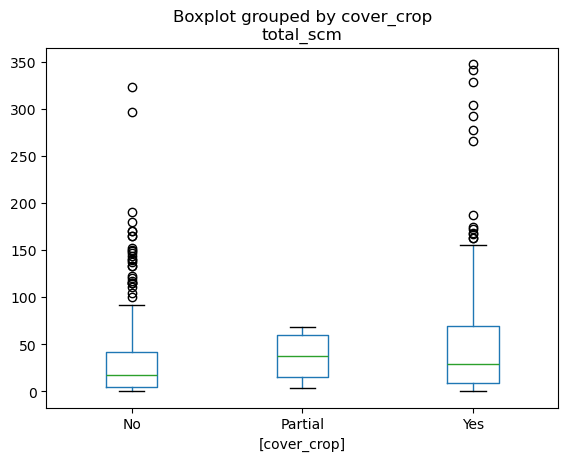

In [117]:
cover_crop[["total_scm", "cover_crop"]].boxplot(by="cover_crop", grid=False)


In [118]:
yes_cc = cover_crop.loc[cover_crop["cover_crop"] == "Yes"]["total_scm"]
no_cc = cover_crop.loc[cover_crop["cover_crop"] == "No"]["total_scm"]
stats.ttest_ind(a=yes_cc, b=no_cc)


TtestResult(statistic=2.505873992875574, pvalue=0.012589507892868841, df=423.0)

In [119]:
manure = adults_management[
    ["record_id", "total_f_scm", "total_m_scm", "total_scm", "manure"]
]
manure["manure"].replace(0, "No", inplace=True)
manure["manure"].replace(1, "Yes", inplace=True)
manure["manure"].replace(2, "NA", inplace=True)
manure


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_13786/4017654348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manure['manure'].replace(0, 'No', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_13786/4017654348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manure['manure'].replace(1, 'Yes', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_13786/4017654348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

record_id  total_f_scm  total_m_scm  total_scm manure
0    DEG_DIE_HILL         15.0         23.0       38.0     No
1    DEG_DIE_HILL         21.0         94.0      115.0     No
2    DEG_DIE_HILL        148.0        176.0      324.0     No
3    DEG_DIE_HILL         33.0        116.0      149.0     No
4    DEG_DIE_HILL          3.0         25.0       28.0     No
..            ...          ...          ...        ...    ...
433       ZUE_REE          3.0          5.0        8.0     No
434       ZUE_REE         68.0         65.0      133.0     No
435       ZUE_REE         93.0         72.0      165.0     No
436       ZUE_REE         24.0         43.0       67.0     No
437       ZUE_REE         78.0        102.0      180.0     No

[438 rows x 5 columns]

In [120]:
yes_manure = manure.loc[manure["manure"] == "Yes"]["total_scm"]
no_manure = manure.loc[manure["manure"] == "No"]["total_scm"]
stats.ttest_ind(a=yes_manure, b=no_manure)


TtestResult(statistic=1.6171102225773455, pvalue=0.10660170995110788, df=422.0)

In [121]:
stats.pointbiserialr(adults_management["total_scm"], adults_management["tillage"])


SignificanceResult(statistic=0.007840422627050377, pvalue=0.8700291176307622)

# Peak Adult Abundance as Response

In [141]:
adult_peak = adults.loc[adults.groupby("record_id")["total_scm"].idxmax()]


In [140]:
adult_peak_climate = adult_peak.merge(
    one_week_climate, on=["record_id", "collection_date"]
)
adult_peak_climate = adult_peak_climate.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_peak_climate.head()


card_id data_collector      record_id collection_date  n_scm_i_m  \
0     2374   Janice Degni   DEG_DIE_HILL      2023-05-04       40.0   
1     2244   Janice Degni    DEG_DIE_SWC      2023-04-21        9.0   
2     2582   Janice Degni   DEG_FOU_WOOD      2023-05-18       17.0   
3     2254   Janice Degni  DEG_PER_STRIP      2023-04-27       26.0   
4     2368   Janice Degni        DEG_VIL      2023-05-04       91.0   

   n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o  ...  \
0       20.0      136.0      128.0              9.0             44.0  ...   
1       26.0        0.0        3.0              0.0              0.0  ...   
2       36.0        8.0        7.0              0.0              1.0  ...   
3       13.0        4.0        3.0              0.0              0.0  ...   
4       87.0       66.0       60.0              0.0              0.0  ...   

  vpd_min_1_week  vpd_max_1_week  rain_inches_1_week  min_temp_f_2_week  \
0        0.31875         5.09375                3.15          37.193333   
1        0.89000        14.39625                0.64          36.560000   
2        0.57500        16.08500                0.00          36.406667   
3        0.52875         9.52500                0.58          39.073333   
4        0.32000         4.92875                3.03          37.046667   

   ave_temp_f_2_week  max_temp_f_2_week  mean_dew_point_2_week  \
0          45.886667          54.580000              37.933333   
1          48.673333          60.786667              34.193333   
2          49.453333          62.533333              36.586667   
3          50.426667          61.793333              39.033333   
4          45.546667          54.086667              37.846667   

   vpd_min_2_week  vpd_max_2_week  rain_inches_2_week  
0        0.460667        7.826000                3.77  
1        1.008000       12.985333                0.64  
2        0.428000       13.255333                0.34  
3        0.713333       12.900667                1.21  
4        0.446000        7.481333                3.57  

[5 rows x 28 columns]

In [67]:
adult_peak_climate_subset = adult_peak_climate[
    [
        "collection_date",
        "n_scm_i_m",
        "n_scm_i_f",
        "n_scm_o_m",
        "n_scm_o_f",
        "n_d_florilega_i",
        "n_d_florilega_o",
        "total_f_scm",
        "total_m_scm",
        "total_scm",
        "min_temp_f_1_week",
        "ave_temp_f_1_week",
        "max_temp_f_1_week",
        "rain_inches_1_week",
        "min_temp_f_2_week",
        "ave_temp_f_2_week",
        "max_temp_f_2_week",
        "rain_inches_2_week",
        "mean_dew_point_1_week",
        "vpd_min_1_week",
        "mean_dew_point_2_week",
        "vpd_min_2_week",
        "vpd_max_2_week", 
        "vpd_max_1_week",
    ]
]

adult_peak_climate_subset["collection_date"] = pd.to_datetime(
    adult_peak_climate_subset["collection_date"], format="%m/%d/%y"
)


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_72394/1124568504.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_peak_climate_subset["collection_date"] = pd.to_datetime(


In [68]:
corr = adult_peak_climate_subset.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


# Soil and Sticky Card Data - Peak

In [102]:
adult_peak_soil = adult_peak.merge(
    soil, on=["record_id"]
)
adult_peak_soil = adult_peak_soil.merge(dairy_one, on='record_id')
adult_peak_soil = adult_peak_soil.drop(['card_id', 'data_collector', 'record_id', 'ny_soils_0', 'ny_soils_01', 'muid', 'hsg', 'hsgw'], axis=1)
adult_peak_soil.head()

collection_date  n_scm_i_m  n_scm_i_f  n_scm_o_m  n_scm_o_f  \
0      2023-05-04       40.0       20.0      136.0      128.0   
1      2023-04-21        9.0       26.0        0.0        3.0   
2      2023-05-18       17.0       36.0        8.0        7.0   
3      2023-05-04       91.0       87.0       66.0       60.0   
4      2023-05-25       77.0       36.0       30.0        9.0   

   n_d_florilega_i  n_d_florilega_o week  total_f_scm  total_m_scm  ...  \
0              9.0             44.0   18        148.0        176.0  ...   
1              0.0              0.0   16         29.0          9.0  ...   
2              0.0              1.0   20         43.0         25.0  ...   
3              0.0              0.0   18        147.0        157.0  ...   
4              0.0              0.0   21         45.0        107.0  ...   

   zn_ppm  cu_ppm  mn_ppm  b_ppm  al_ppm  s_ppm  morgan_p_lb_a  morgan_k_lb_a  \
0     2.6     1.8    33.9    0.3    1546     26           13.9          695.0   
1     3.9    21.0    66.6    0.3    1277     26           10.8          354.9   
2    10.8    21.4    55.7    0.5    1075     32           12.7          816.7   
3     3.3     6.8    45.1    0.2    1578     19           11.2          394.7   
4    25.6    12.7   101.9    1.5     786     30           53.3          268.6   

   morgan_ca_lb_a  morgan_mg_lb_a  
0          2233.2           233.2  
1          2721.4           337.1  
2          2936.8           440.3  
3          1359.7           164.6  
4          6919.0           576.7  

[5 rows x 44 columns]

In [103]:
corr = adult_peak_soil.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

# GDD and Sticky Card Data - Peak

In [259]:
gdd_peak_adults = adult_peak.merge(gdd, left_on=['record_id', 'collection_date'], right_on=['record_id', 'date']).drop(['card_id', 'data_collector', 'record_id'], axis=1)

In [260]:
corr = gdd_peak_adults.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

## Landscape and Sticky Card Data

### 500m

In [126]:
adults_peak_500 = adult_peak.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)

adults_peak_500 = adults_peak_500.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_peak_500["collection_date"] = pd.to_datetime(
    adults_peak_500["collection_date"], format="%m/%d/%y"
)


In [127]:
corr = adults_peak_500.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 1000m

In [128]:
adults_peak_1000 = adult_peak.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)

adults_peak_1000 = adults_peak_1000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_peak_1000["collection_date"] = pd.to_datetime(
    adults_peak_1000["collection_date"], format="%m/%d/%y"
)


In [129]:
corr = adults_peak_1000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 2000m

In [130]:
adults_peak_2000 = adult_peak.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)

adults_peak_2000 = adults_peak_2000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_peak_2000["collection_date"] = pd.to_datetime(
    adults_peak_2000["collection_date"], format="%m/%d/%y"
)


In [131]:
corr = adults_peak_2000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


### 3000m

In [132]:
adults_peak_3000 = adult_peak.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)

adults_peak_3000 = adults_peak_3000.drop(
    ["card_id", "data_collector", "record_id"],
    axis=1,
)

adults_peak_3000["collection_date"] = pd.to_datetime(
    adults_peak_3000["collection_date"], format="%m/%d/%y"
)


In [133]:
corr = adults_peak_3000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)


# Management and Sticky Card Data - Peaks

In [134]:
adults_peak_management = adult_peak.merge(
    management, left_on="record_id", right_on="field_id"
)


In [135]:
le = preprocessing.LabelEncoder()
adults_peak_management["cover_crop"] = le.fit_transform(
    adults_peak_management["cover_crop"]
)
adults_peak_management["manure"] = le.fit_transform(adults_peak_management["manure"])
adults_peak_management["tillage"] = le.fit_transform(adults_peak_management["tillage"])


In [136]:
stats.pointbiserialr(
    adults_peak_management["total_scm"], adults_peak_management["cover_crop"]
)


SignificanceResult(statistic=0.18263132617703254, pvalue=0.1950136382920231)

In [79]:
cover_crop = adults_peak_management[
    ["record_id", "total_f_scm", "total_m_scm", "total_scm", "cover_crop"]
]
cover_crop["cover_crop"].replace(0, "No", inplace=True)
cover_crop["cover_crop"].replace(1, "Partial", inplace=True)
cover_crop["cover_crop"].replace(2, "Yes", inplace=True)
cover_crop.head()

NameError: name 'adults_peak_management' is not defined

<Axes: title={'center': 'total_scm'}, xlabel='[cover_crop]'>

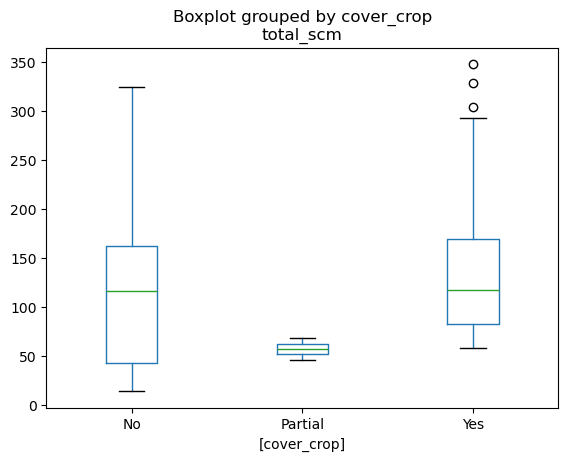

In [138]:
cover_crop[["total_scm", "cover_crop"]].boxplot(by="cover_crop", grid=False)


In [139]:
yes_cc = cover_crop.loc[cover_crop["cover_crop"] == "Yes"]["total_scm"]
no_cc = cover_crop.loc[cover_crop["cover_crop"] == "No"]["total_scm"]
stats.ttest_ind(a=yes_cc, b=no_cc)


TtestResult(statistic=1.3170385866333345, pvalue=0.19407883162475387, df=48.0)

In [69]:
manure = adults_peak_management[
    ["record_id", "total_f_scm", "total_m_scm", "total_scm", "manure"]
]
manure["manure"].replace(0, "No", inplace=True)
manure["manure"].replace(1, "Yes", inplace=True)
manure["manure"].replace(2, "NA", inplace=True)
manure.head()


NameError: name 'adults_peak_management' is not defined

In [141]:
yes_manure = manure.loc[manure["manure"] == "Yes"]["total_scm"]
no_manure = manure.loc[manure["manure"] == "No"]["total_scm"]
stats.ttest_ind(a=yes_manure, b=no_manure)


TtestResult(statistic=0.010252806825923296, pvalue=0.9918620825114823, df=48.0)

In [142]:
stats.pointbiserialr(adults_management["total_scm"], adults_management["tillage"])

SignificanceResult(statistic=0.007840422627050377, pvalue=0.8700291176307622)

# Create Table - All Features - Peak Abundance

In [146]:
adult_peak_features = adult_peak.merge(one_week_climate, on=["record_id", "collection_date"])
adult_peak_features = adult_peak_features.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_peak_features = adult_peak_features.merge(
    management, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_peak_features = adult_peak_features.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_peak_features = adult_peak_features.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_peak_features = adult_peak_features.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_peak_features = adult_peak_features.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adult_peak_features = adult_peak_features.merge(
    gdd[
        [
            "record_id",
            "date",
            "gdd_fahrenheit_simple",
            "gdd_fahrenheit_simple_cumsum",
            "gdd_fahrenheit_sine",
            "gdd_fahrenheit_sine_cum_sum",
        ]
    ],
    left_on=["record_id", "collection_date"],
    right_on=["record_id", "date"],
).drop("date", axis=1)
adult_peak_features = adult_peak_features.merge(soil, on='record_id')
adult_peak_features = adult_peak_features.merge(dairy_one, on='record_id')

adult_peak_features.to_csv("Data/2023_adult_peak_features.csv")


# Weekly Numbers as Response

## Week 18

In [147]:
adults_week_18 = adults.loc[adults['week'] == '18']
adults_week_18.head()

card_id data_collector      record_id collection_date  n_scm_i_m  \
24      2374   Janice Degni   DEG_DIE_HILL      2023-05-04       40.0   
42      2364   Janice Degni    DEG_DIE_SWC      2023-05-04        5.0   
78      2362   Janice Degni  DEG_PER_STRIP      2023-05-04       11.0   
96      2368   Janice Degni        DEG_VIL      2023-05-04       91.0   
109     2360   Janice Degni  DEG_YOU_BOCES      2023-05-04       28.0   

     n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o week  \
24        20.0      136.0      128.0              9.0             44.0   18   
42        10.0        4.0        3.0              0.0              1.0   18   
78        10.0        5.0       11.0              1.0              1.0   18   
96        87.0       66.0       60.0              0.0              0.0   18   
109       15.0       22.0        9.0              1.0              0.0   18   

     total_f_scm  total_m_scm  total_scm  
24         148.0        176.0      324.0  
42          13.0          9.0       22.0  
78          21.0         16.0       37.0  
96         147.0        157.0      304.0  
109         24.0         50.0       74.0

In [148]:
adults_week_18_features = adults_week_18.merge(one_week_climate, on=["record_id", "collection_date"])
adults_week_18_features = adults_week_18_features.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adults_week_18_features = adults_week_18_features.merge(
    management, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adults_week_18_features = adults_week_18_features.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adults_week_18_features = adults_week_18_features.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adults_week_18_features = adults_week_18_features.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adults_week_18_features = adults_week_18_features.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop("field_id", axis=1)
adults_week_18_features = adults_week_18_features.merge(
    gdd[
        [
            "record_id",
            "date",
            "gdd_fahrenheit_simple",
            "gdd_fahrenheit_simple_cumsum",
            "gdd_fahrenheit_sine",
            "gdd_fahrenheit_sine_cum_sum",
        ]
    ],
    left_on=["record_id", "collection_date"],
    right_on=["record_id", "date"],
).drop("date", axis=1)
adults_week_18_features = adults_week_18_features.merge(soil, on='record_id')
adults_week_18_features = adults_week_18_features.merge(dairy_one, on='record_id')

adults_week_18_features.to_csv("Data/2023_adult_week_18_features.csv")
